# Credit Card Fraud Detection
Dealing with imbalanced datasets

Detect analomoies which can indicate possibly fradulant charges in credit card transaction data.

Data source: https://github.com/rajeevratan84/datascienceforbusiness/blob/master/creditcard.zip

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections



from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum().max()

0

In [5]:
df.shape

(284807, 31)

In [6]:
df.drop_duplicates(subset=None, inplace=True)

In [7]:
df.shape

(283726, 31)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

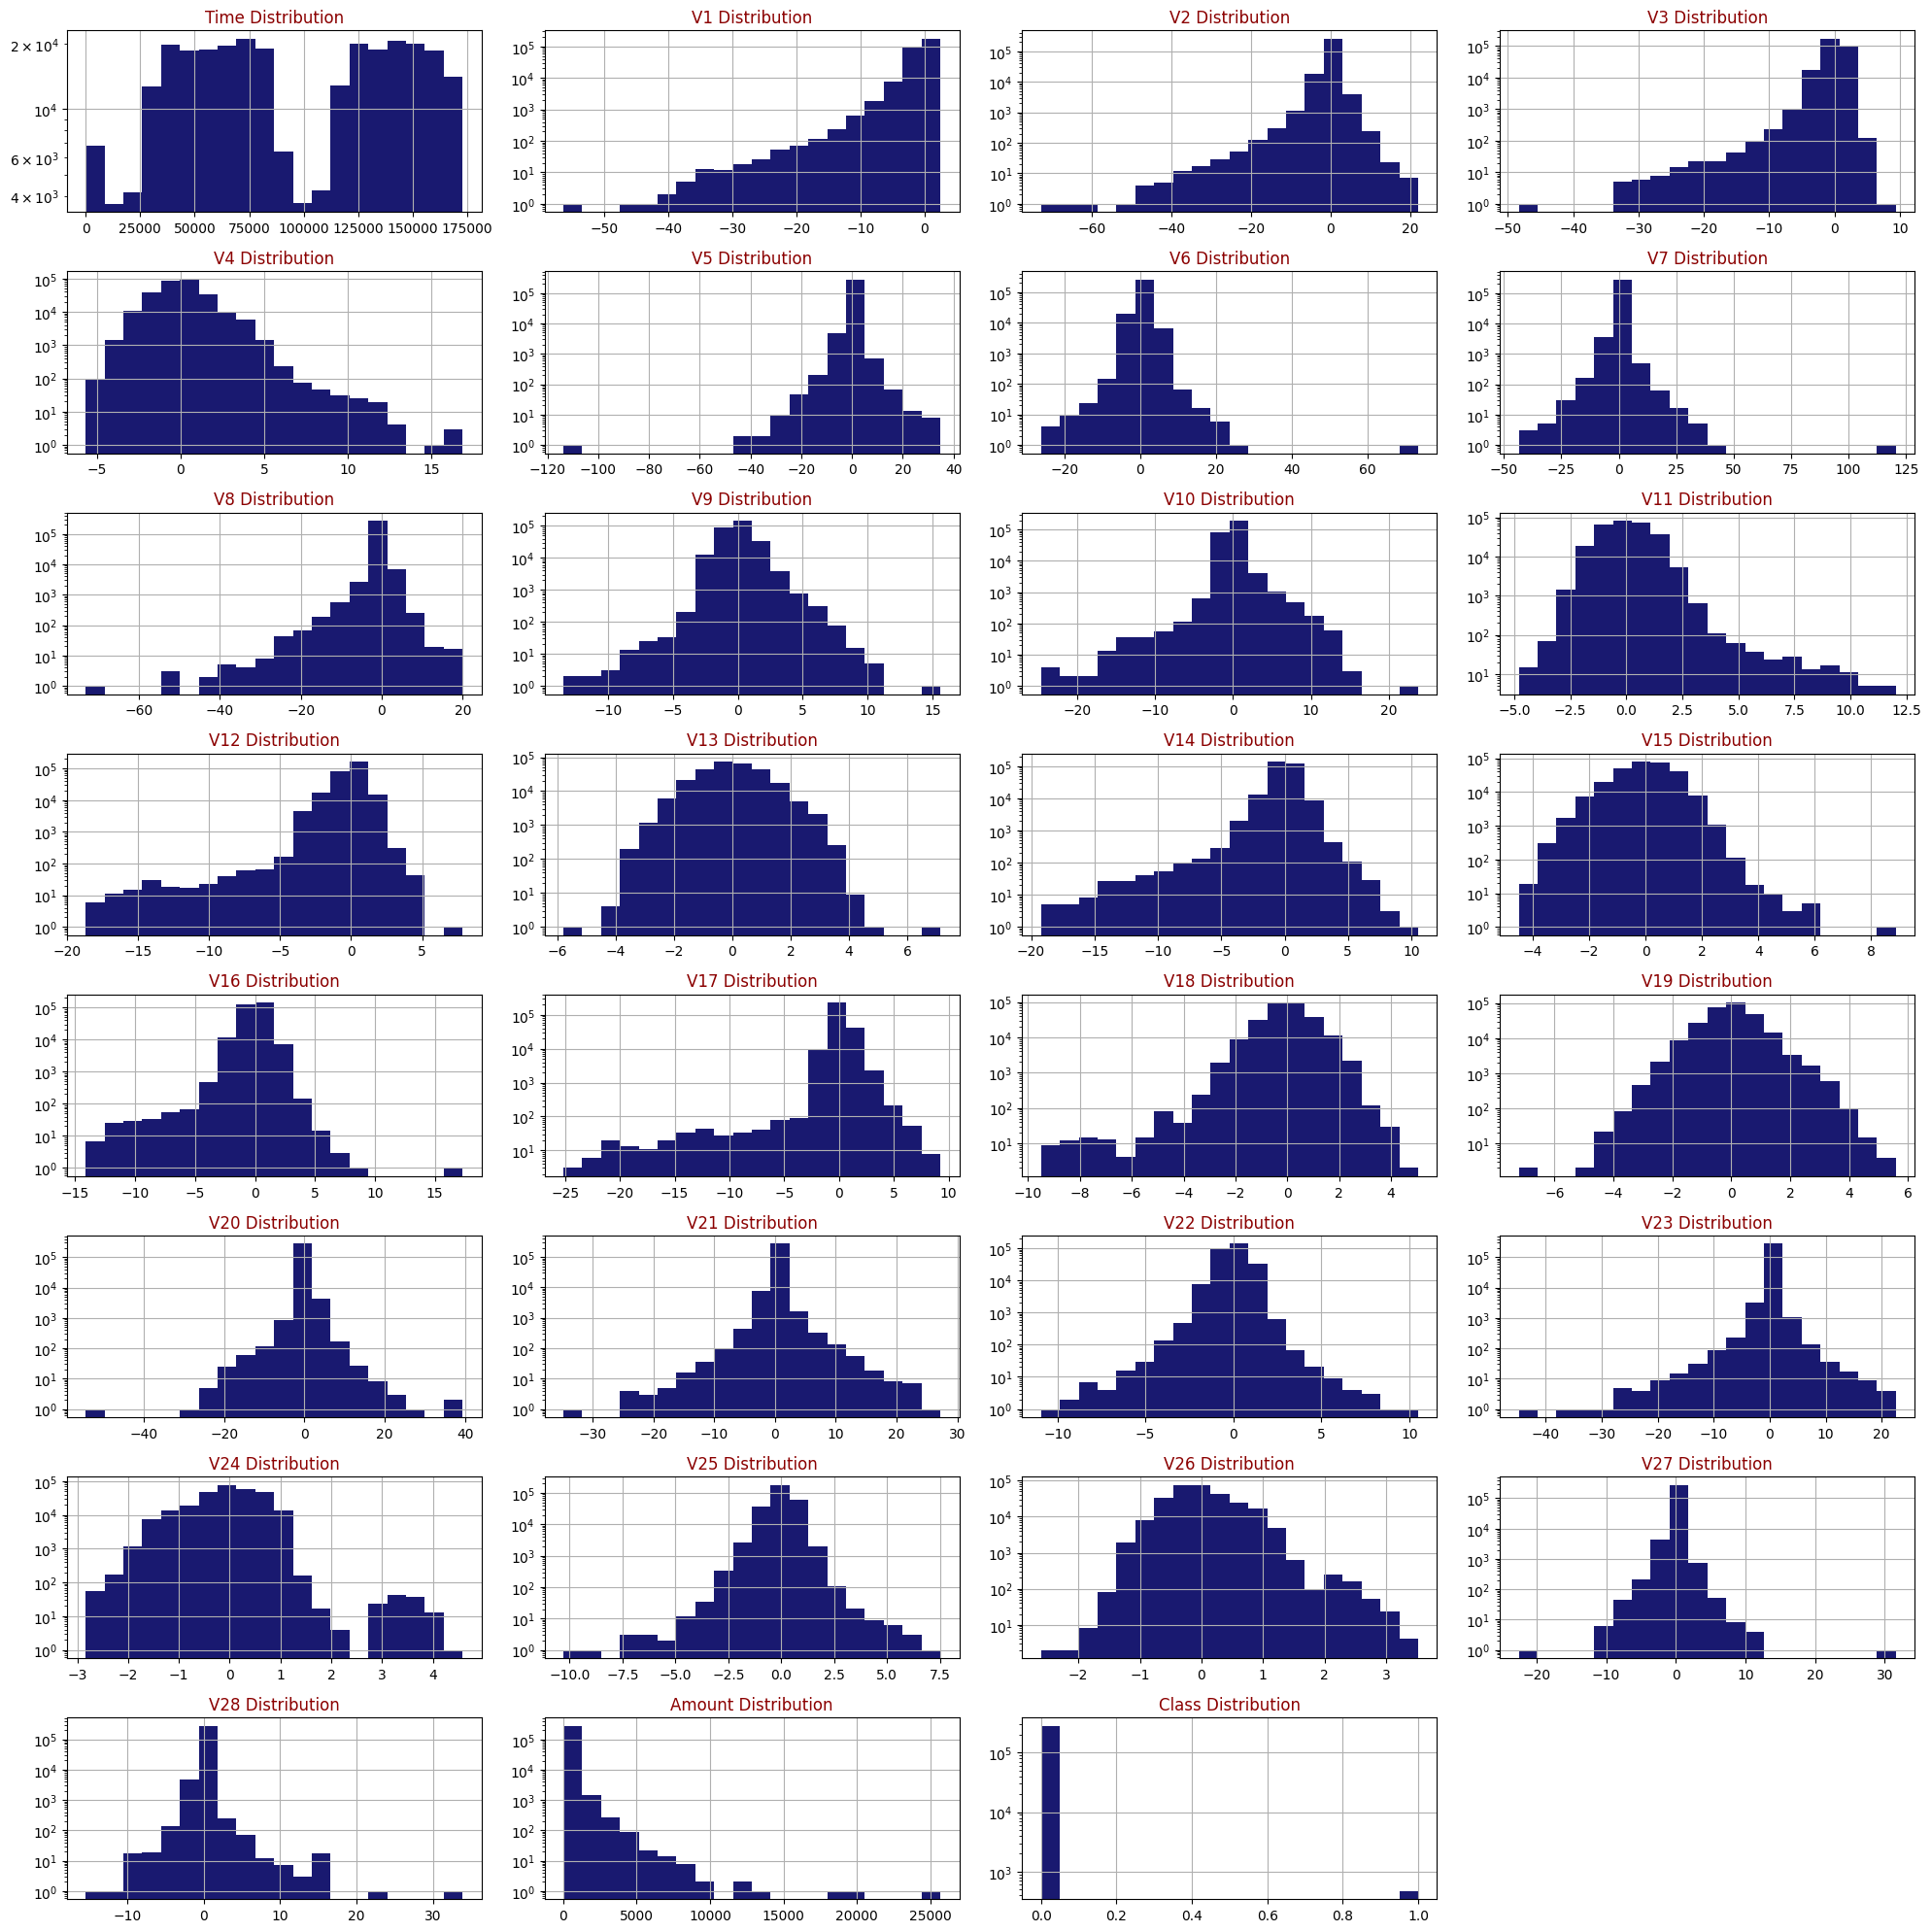

In [10]:
def draw_histogram(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution", color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()

draw_histogram(df,df.columns,8,4)

In [11]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [12]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

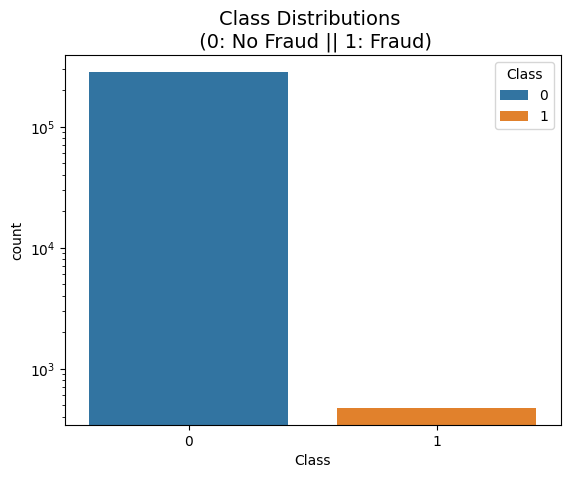

In [13]:
ax=sns.countplot(df, x="Class", hue="Class")
ax.set_yscale('log')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

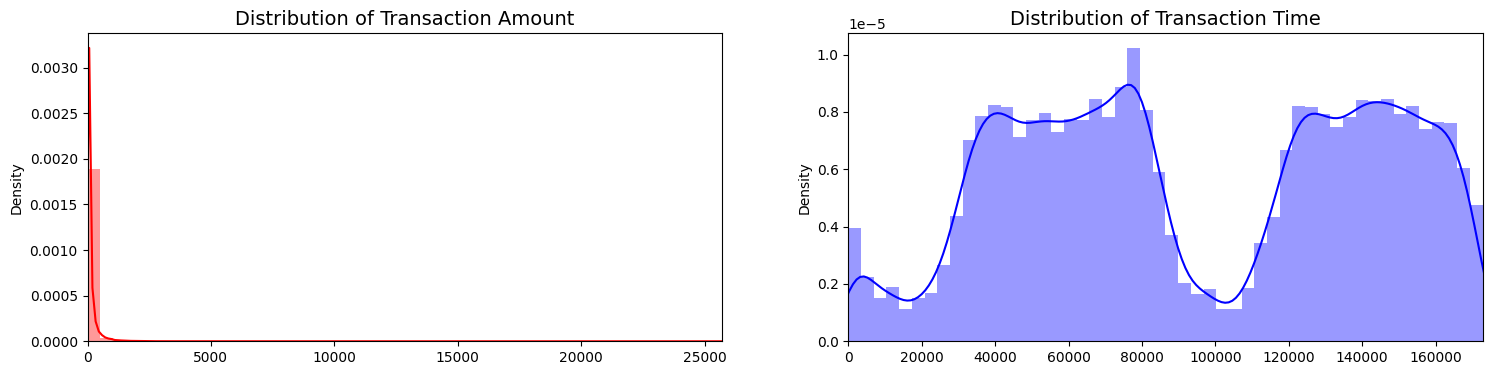

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

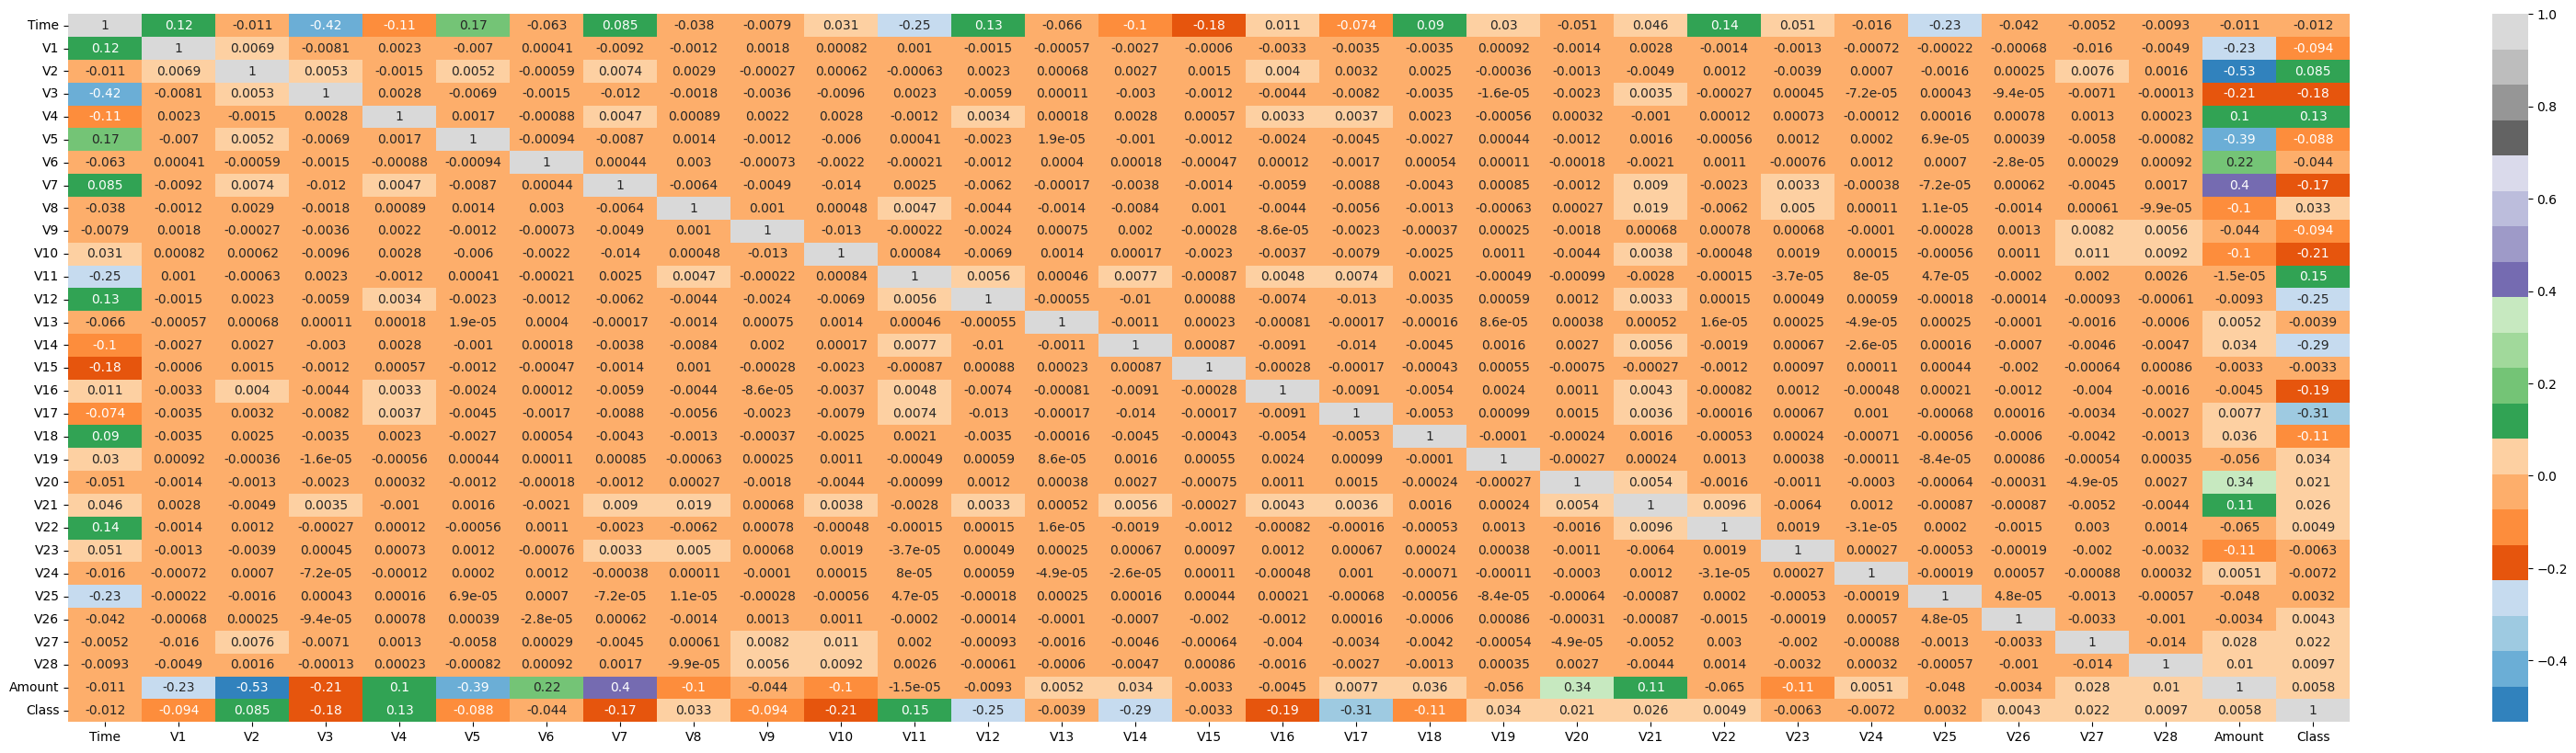

In [15]:
# Correlation matrix
plt.figure(figsize=(40,10))
sns.heatmap(df.corr(), annot=True, cmap="tab20c")
plt.show()

Note
• The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
• We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with p-value, for identifying the correct variable to select/eliminate from the model.

# Modeling with a Logistic Regression

In [16]:
estimators=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
X1=df[estimators]
y=df['Class']

In [17]:
col=X1.columns[:-1]
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [18]:
import statsmodels.api as sm

In [19]:
# Using SM(Stats Model's Log Reg) 
X=sm.add_constant(X1)
reg_logit=sm.Logit(y,X)
result_logit=reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003922
         Iterations 13


In [20]:
result_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283695
Method:                           MLE   Df Model:                           30
Date:                Wed, 25 Sep 2024   Pseudo R-squ.:                  0.6819
Time:                        15:51:48   Log-Likelihood:                -1112.8
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3983      0.250    -33.602      0.000      -8.888      -7.908
Time       -3.676e-06   2.26e-06     -1.627      0.104    -8.1e-06    7.51e-07
V1             0.0961      0.042      2.270      0.023       0.013       0.179
V2             0.0106      0.058      0.182      0.855      -0.103       0.125
V3            -0.0083      0.053     -0.157      0.875      -0.112       0.096
V4             0.7013      0.074      9.484      0.000       0.556       0.846
V5             0.1305      0.067      1.952      0.051      -0.001       0.262
V6            -0.1240      0.074     -1.671      0.095      -0.269       0.021
V7            -0.0948      0.067     -1.421      0.155      -0.226       0.036
V8            -0.1766      0.031     -5.769      0.000      -0.237      -0.117
V9            -0.2825      0.111     -2.551      0.011      -0.500      -0.065
V10           -0.8230      0.097     -8.497      0.000      -1.013      -0.633
V11           -0.0579      0.081     -0.711      0.477      -0.217       0.102
V12            0.0831      0.087      0.955      0.339      -0.087       0.254
V13           -0.3257      0.082     -3.986      0.000      -0.486      -0.166
V14           -0.5477      0.062     -8.785      0.000      -0.670      -0.426
V15           -0.1207      0.086     -1.403      0.161      -0.289       0.048
V16           -0.1992      0.125     -1.592      0.111      -0.444       0.046
V17           -0.0139      0.070     -0.198      0.843      -0.151       0.124
V18           -0.0139      0.129     -0.107      0.914      -0.267       0.239
V19            0.0985      0.097      1.015      0.310      -0.092       0.289
V20           -0.4616      0.082     -5.660      0.000      -0.621      -0.302
V21            0.3944      0.060      6.564      0.000       0.277       0.512
V22            0.6377      0.134      4.750      0.000       0.375       0.901
V23           -0.1021      0.059     -1.733      0.083      -0.217       0.013
V24            0.1191      0.148      0.807      0.420      -0.170       0.409
V25           -0.0506      0.133     -0.379      0.704      -0.312       0.211
V26            0.0094      0.190      0.050      0.960      -0.363       0.382
V27           -0.8265      0.122     -6.778      0.000      -1.065      -0.587
V28           -0.2973      0.088     -3.378      0.001      -0.470      -0.125
Amount         0.0009      0.000      2.454      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Note:
The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of fraud.
Backward elimination approach is used here to remove those attributes with highest Pvalue one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.

More Notes:
In a binary logistic regression model, using those variables as independent variables, you can learn how the presence of a characteristic relates to the odds of the “event” happening. The event is one of the two possible values that you have for your binary outcome variable.
Typically, when an independent variable is not significant (i.e. P > 0.05), you at least consider removing it from the model. You don’t want to include too many variables that are not significant because it reduces the precision of your model.

In [21]:
# Feature Selection: Backward elimination (P-value approach)

def back_feature_elem(data_frame, dep_var, col_list):
    """Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating feature with the highest P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list) > 0:
        model = sm.Logit(dep_var, data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0] < 0.05:
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

result = back_feature_elem(X, df.Class, col)
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283701
Method:                           MLE   Df Model:                           24
Date:                Wed, 25 Sep 2024   Pseudo R-squ.:                 0.03183
Time:                        15:52:04   Log-Likelihood:                -3386.9
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                 3.947e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time          -0.0001   1.43e-06    -85.924      0.000      -0.000      -0.000
V1             0.8891      0.028     31.770      0.000       0.834       0.944
V2            -0.4504      0.023    -19.221      0.000      -0.496      -0.405
V3            -1.6025      0.032    -49.412      0.000      -1.666      -1.539
V4             0.1457      0.026      5.709      0.000       0.096       0.196
V5             0.4091      0.024     17.030      0.000       0.362       0.456
V6            -0.3883      0.025    -15.228      0.000      -0.438      -0.338
V7             0.0986      0.028      3.529      0.000       0.044       0.153
V8            -0.3896      0.023    -17.071      0.000      -0.434      -0.345
V9            -0.4603      0.043    -10.647      0.000      -0.545      -0.376
V10           -0.3865      0.051     -7.513      0.000      -0.487      -0.286
V11           -0.6094      0.034    -17.849      0.000      -0.676      -0.542
V12            0.1223      0.034      3.563      0.000       0.055       0.190
V13           -0.4500      0.035    -13.042      0.000      -0.518      -0.382
V14           -0.6893      0.032    -21.761      0.000      -0.751      -0.627
V15           -1.0460      0.041    -25.257      0.000      -1.127      -0.965
V16           -0.2471      0.042     -5.925      0.000      -0.329      -0.165
V17           -0.7008      0.033    -21.372      0.000      -0.765      -0.637
V20           -0.6800      0.050    -13.632      0.000      -0.778      -0.582
V21            0.5744      0.041     13.900      0.000       0.493       0.655
V22            1.3583      0.062     21.848      0.000       1.236       1.480
V23            0.2907      0.055      5.294      0.000       0.183       0.398
V25           -1.9920      0.073    -27.453      0.000      -2.134      -1.850
V26            0.3016      0.072      4.194      0.000       0.161       0.443
V27           -0.7760      0.090     -8.607      0.000      -0.953      -0.599
==============================================================================

Possibly complete quasi-separation: A fraction 0.68 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Logistic regression eqation
### P=e^(B0+B1X1)/1+e^(B0+B1X1)

In [22]:
new_features=df[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V20','V21','V22','V23','V25','V26','V27','Class']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=5,stratify=y)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9990131463010609


<Axes: >

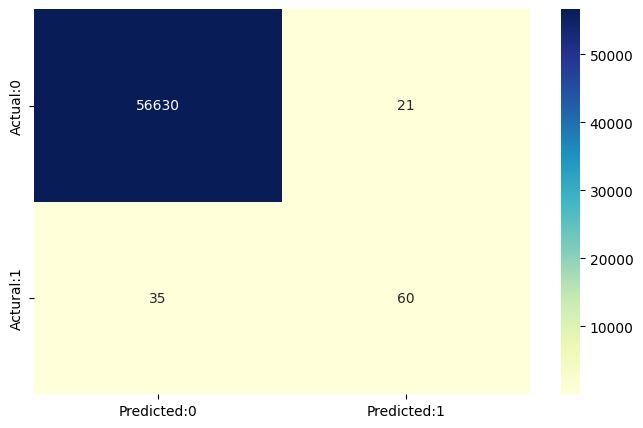

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actural:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [26]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [27]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) =',(TP+TN)/float(TP+TN+FP+FN), '\n',
'The Missclassification = 1-Accuracy =',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate = TP/(TP+FN)=',TP/float(TP+FN),'\n',
'Sensitivity or True Negative Rate = TN/(TN+FP)=',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP)=',TP/float(TP+FP),'\n',
'Negative Predictive value = TN/(TN+FN)=',TN/float(TN+FN),'\n',
'Positive likehood ratio = Sensitivity/(1-Specificity) =',sensitivity/(1-specificity),'\n',
'Negative likehood ratio = (1-Sensitivity)/Specificity =',(1-sensitivity)/specificity )

The accuracy of the model = TP+TN/(TP+TN+FP+FN) = 0.9990131463010609 
 The Missclassification = 1-Accuracy = 0.0009868536989391385 
 Sensitivity or True Positive Rate = TP/(TP+FN)= 0.631578947368421 
 Sensitivity or True Negative Rate = TN/(TN+FP)= 0.9996293092796243 
 Positive Predictive value = TP/(TP+FP)= 0.7407407407407407 
 Negative Predictive value = TN/(TN+FN)= 0.9993823347745522 
 Positive likehood ratio = Sensitivity/(1-Specificity) = 1703.789473684111 
 Negative likehood ratio = (1-Sensitivity)/Specificity = 0.36855767354108393


From the above statistics it is clear that the model is more highly specific than sensitive. The negative values are prediceted more accurately than the positive.

### Predicted probabilities of 0 (No Fraud) and 1 (Fraud) for the test data with a default classification threshold of 0.5.

#### Lower the threshold

Since the model is predicting Fraud too many type II errors is not advisable.

A False Negative (ignoring the probability of Fraud when there actually is one) is more dangerous than a False Positive in this case. Hence, in order to increase the sensitivity, the threshold can be lowered.

In [30]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix

for i in range(0, 11):
    cm2 = 0
    # Predict probabilities of the test set
    y_pred_prob_yes = logreg.predict_proba(x_test)
    
    # Binarize the predictions based on threshold i/10
    y_pred2 = binarize(y_pred_prob_yes, threshold=i/20)[:, 1]
    
    # Calculate the confusion matrix
    cm2 = confusion_matrix(y_test, y_pred2)
    
    # Print the results
    print('With', i/20, 'threshold the Confusion Matrix is:\n', cm2, '\n',
          'correct predictions and', cm2[1, 0], 'Type II errors (False Negatives)\n',
          'Sensitivity:', cm2[1, 1] / float(cm2[1, 1] + cm2[1, 0]),
          'Specificity:', cm2[0, 0] / float(cm2[0, 0] + cm2[0, 1]), '\n\n')

With 0.0 threshold the Confusion Matrix is:
 [[    0 56651]
 [    0    95]] 
 correct predictions and 0 Type II errors (False Negatives)
 Sensitivity: 1.0 Specificity: 0.0 


With 0.05 threshold the Confusion Matrix is:
 [[56323   328]
 [   23    72]] 
 correct predictions and 23 Type II errors (False Negatives)
 Sensitivity: 0.7578947368421053 Specificity: 0.994210163986514 


With 0.1 threshold the Confusion Matrix is:
 [[56511   140]
 [   26    69]] 
 correct predictions and 26 Type II errors (False Negatives)
 Sensitivity: 0.7263157894736842 Specificity: 0.9975287285308291 


With 0.15 threshold the Confusion Matrix is:
 [[56576    75]
 [   28    67]] 
 correct predictions and 28 Type II errors (False Negatives)
 Sensitivity: 0.7052631578947368 Specificity: 0.998676104570087 


With 0.2 threshold the Confusion Matrix is:
 [[56598    53]
 [   30    65]] 
 correct predictions and 30 Type II errors (False Negatives)
 Sensitivity: 0.6842105263157895 Specificity: 0.9990644472295281 


W

### ROC curve

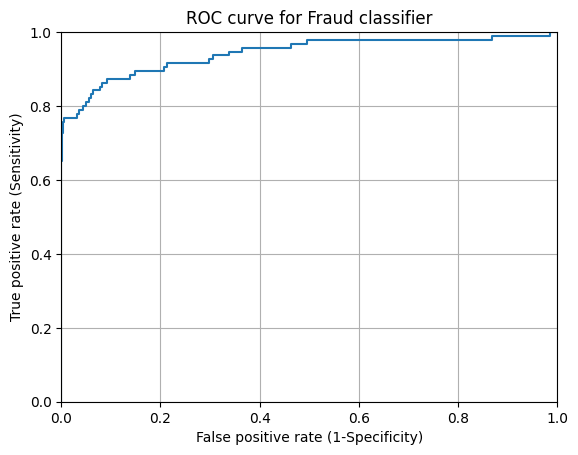

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (true positives / total positives) versus the false positive rate (false positives / total negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for the ROC curve is towards the top-left corner where the specificity and sensitivity are at optimum levels.

Area Under the Curve (AUC): The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. Area of 1 is ideal. The closer the AUC to 1 the better.

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob_yes[:,-1])

0.9426795086071784

## Conclusion

All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting a significant role in the fraud prediction.

The Area under the ROC curve is 90.41, which is good.

Overall, the model could be improved with more data.